# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. `Pandas` и `Seaborn`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 4 балла
* Задача 2 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 5 баллов
* Задача 4 &mdash; 3 балла
* Задача 5 &mdash; 8 баллов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие. Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv` со следующими полями:
* `school` &mdash; номер школы;
* `test_score` &mdash; результат одного ученика из этой школы;
* `number_of_students` &mdash; кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

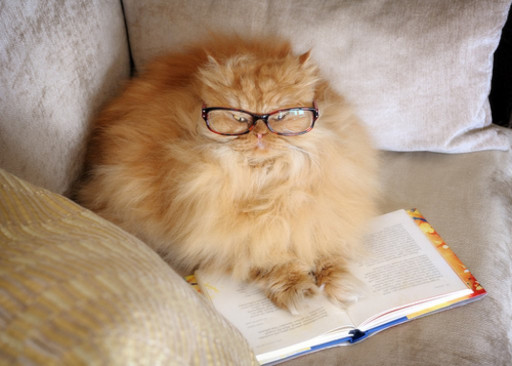

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

*Подсказка.* Это можно сделать с помощью методов  <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [2]:
df = pd.read_csv("cat_exam_data.csv")
df.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [3]:
df.isna().any()

school                False
test_score             True
number_of_students    False
dtype: bool

In [4]:
df = df.dropna()

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции.

In [5]:
df.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,-0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Отдельного внимания заслуживает среднее. Какими способами его можно посчитать? Произведите вычисления и *подробно* проинтерпретируйте результаты. Что стоит публиковать в официальной статистике?

Можно вычислить среднее арифметическое. Эта величина:
* интуитивна
* сильно подвержена выбросам
* как следствие, малоинформативна

In [6]:
df[["test_score", "number_of_students"]].mean()

test_score              51.681788
number_of_students    1088.910569
dtype: float64

Можно вычислить медиану. Эта величина:
* меньше подвержена выбросам
* дает больше информации о выборке

In [7]:
df[["test_score", "number_of_students"]].median()

test_score              52.0
number_of_students    1079.0
dtype: float64

Можно еще подсчитать моду. Эта величина:
* дает хорошее представление о выборке
* однако плохо подходит для численных данных (без повторений)

In [8]:
df[["test_score", "number_of_students"]].mode()

,test_score,number_of_students
0,52.0,1244


Для подсчета среднего балла также можно изначально усреднить его по школе, таким образом количество учеников в школе будет меньше влиять на результат

In [9]:
df.groupby("school")["test_score"].mean().mean()

51.71075790943222

В нашем случае все величины не сильно отличаются (кроме моды для числа учеников). Что публиковать в официальной статистике - вопрос не анализа данных, это зависит от ваших целей.

Посчитайте сколько котиков получили 100 баллов.

In [10]:
df[df["test_score"] == 100].count()

school                51
test_score            51
number_of_students    51
dtype: int64

Выведите подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.
Отсортируйте эти школы по количеству стобалльников.

*Подсказка.* Могут помочь методы <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [11]:
info = df.groupby("school").agg(
    mean_score=("test_score", "mean"),
    full_score=("test_score", lambda s: s[s == 100].count()),
    number_students=("number_of_students", pd.Series.mode)
)
info[info.full_score > 0].sort_values("full_score", ascending=False)

,mean_score,full_score,number_students
school,,,
486,50.325000,2.0,800
4,51.025641,1.0,1015
395,51.385321,1.0,436
302,51.554384,1.0,1517
303,51.247496,1.0,701
315,51.566494,1.0,580
328,52.557668,1.0,789
342,51.389130,1.0,920
346,51.707558,1.0,913


Посчитайте средний результат каждой из школ и посмотрите на результат. Рассматриваем все школы, не только со стобальниками.

*Подсказка.* Может помочь метод <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [12]:
info

,mean_score,full_score,number_students
school,,,
0,52.294258,0.0,418
1,52.028950,0.0,1209
2,51.751451,0.0,1035
3,51.566265,0.0,1245
4,51.025641,1.0,1015
...,...,...,...
495,50.933275,0.0,1139
496,51.146402,0.0,1209
497,51.141228,0.0,1140


Отсортируйте школы по среднему результату.

In [13]:
top_mean = info.sort_values("mean_score", ascending=False)
top_mean

,mean_score,full_score,number_students
school,,,
57,53.341682,0.0,560
124,52.993311,0.0,598
263,52.982063,0.0,669
82,52.981982,1.0,555
366,52.970207,0.0,773
...,...,...,...
194,50.406977,0.0,774
471,50.362500,1.0,960
486,50.325000,2.0,800


Посмотрите на топ 10 лучших результатов.

In [14]:
top_mean.head(10)

,mean_score,full_score,number_students
school,,,
57,53.341682,0.0,560
124,52.993311,0.0,598
263,52.982063,0.0,669
82,52.981982,1.0,555
366,52.970207,0.0,773
465,52.957555,0.0,1179
169,52.932401,0.0,858
449,52.910364,0.0,357
477,52.898515,0.0,808


**Вывод:** Зависимости между средним баллом и размером школы не прослеживается

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим. Посмотрите теперь на 10 худших школ.

In [15]:
top_mean.tail(10)

,mean_score,full_score,number_students
school,,,
383,50.716981,0.0,636
264,50.702906,0.0,929
48,50.690293,0.0,649
156,50.641354,0.0,1093
394,50.461538,1.0,1079
194,50.406977,0.0,774
471,50.362500,1.0,960
486,50.325000,2.0,800
211,50.248571,0.0,351


**Вывод:** Так же не видна зависимость

Постройте график зависимости среднего результата ЕКЭ от количества учеников.

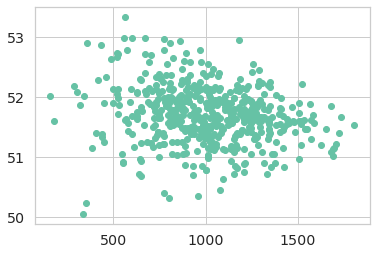

In [16]:
plt.scatter(info["number_students"], info["mean_score"])
plt.show()

**Вывод:** Действительно, похоже на то, что зависимости нет

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы, получив тем самым два датасета. Будем считать, что школа небольшая, если в ней не более 1000 учеников.

In [17]:
small = df[df["number_of_students"] <= 1000]
big = df[df["number_of_students"] > 1000]

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` &mdash; число бинов гистограммы;
* `alpha=0.5` &mdash; прозрачность бинов.

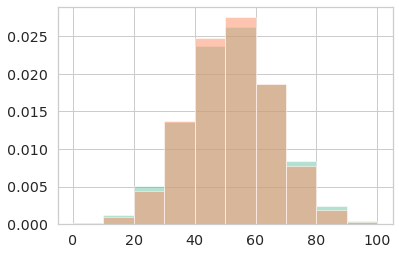

In [18]:
plt.hist(small["test_score"], bins=10, alpha=0.5, density=True)
plt.hist(big["test_score"], bins=10, alpha=0.5, density=True)
plt.show()

**Вывод:** маленькие и большие школы показывают одинаковые распределения баллов среди учеников

---

### Задача 2

Задача заключается в работе с данными о трендах на <a target="_blank" href="https://www.youtube.com/">YouTube</a>. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

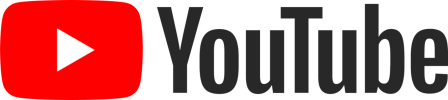


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a target="_blank" href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

*Замечание. Часто считывание дат &mdash; головная боль аналитика.*

In [19]:
df = pd.read_csv("RUvideos_short.csv")
df["trending_date"] = pd.to_datetime(
    df["trending_date"], format="%y.%d.%m"
)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` &mdash; дата в формате год-день-месяц;
* `category_id` &mdash; категория видео, названия приведены в файле `RU_category_id.json`;
* `views` &mdash; количество просмотров видео;
* `likes` &mdash; количество лайков;
* `dislikes` &mdash; количество дислайков;
* `comment_count` &mdash; количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у объекта даты. Напечатайте начало таблицы.

In [20]:
df = df[["trending_date", "category_id", "views", "likes", "dislikes", "comment_count"]]
df["trending_date"] = df["trending_date"].map(lambda d: d.day)
df.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

<AxesSubplot:xlabel='trending_date', ylabel='views'>

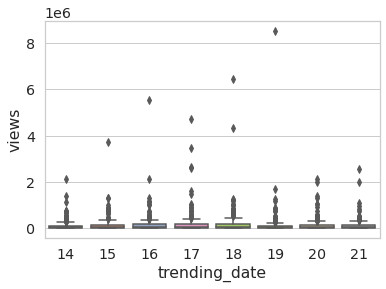

In [21]:
sns.boxplot(x="trending_date", y="views", data=df)

Исправьте этот недостаток, установив некоторое значение. 

[None]

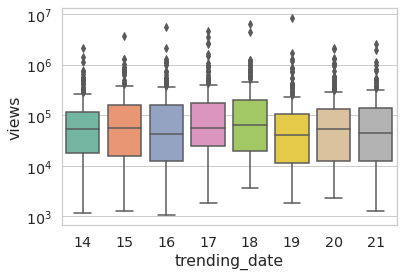

In [22]:
sns.boxplot(x="trending_date", y="views", data=df).set(yscale="log")

Постройте `jointplot` по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

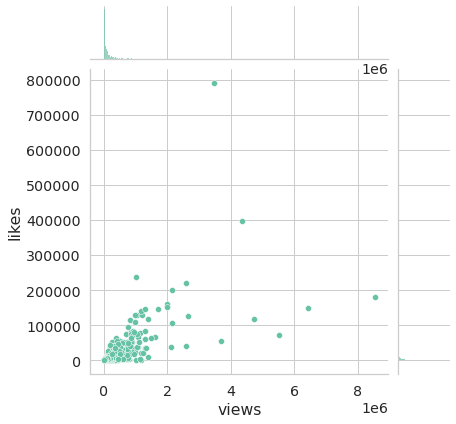

In [23]:
sns.jointplot(x="views", y="likes", data=df)

Исправьте этот недостаток.

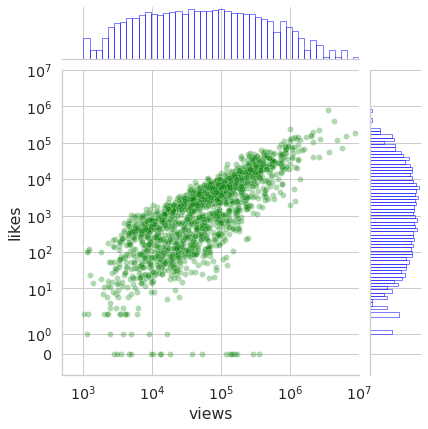

In [24]:
bins = np.logspace(0, 7, 80)
jg = sns.jointplot(x="views", y="likes", data=df, alpha=0.3, color="green",
                   marginal_kws=dict(bins=bins, fill=False, color="blue"))
ax = jg.ax_joint
ax.set_xscale('symlog')
ax.set_yscale('symlog')
ax.set_xlim(500, 10e6)
ax.set_ylim(-1, 10e6)
jg.ax_marg_x.set_yscale('log')
jg.ax_marg_y.set_xscale('log')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 3

<a target="_blank" href="https://www.netflix.com">Netflix</a> за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


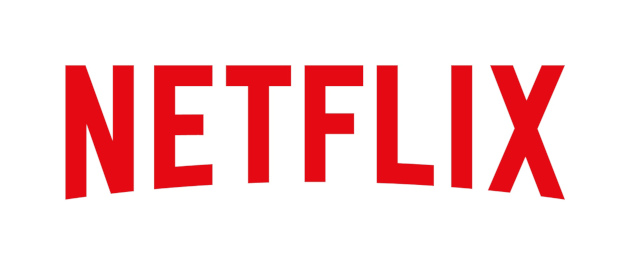

Описание признаков:
* `title` &mdash; название шоу;
* `rating` &mdash; рейтинг шоу. Например: G, PG, TV-14, TV-MA;
* `ratingLevel` &mdash; описание рейтинговой группы и особенностей шоу;
* `release year` &mdash; год выпуска шоу;
* `user rating score` &mdash; оценка пользователей.


Загрузите данные, выполнив код ниже.

In [25]:
data = pd.read_csv(<путь до данных>, encoding='cp437')

del data['ratingDescription'], data['user rating size']

SyntaxError: invalid syntax (<ipython-input-25-d5ff1adf407e>, line 1)

Удалите из данных дупликаты. Сколько объектов удалено?

In [ ]:
...

Сколько объектов осталось?

In [ ]:
...

Есть ли в данных пропуски?

Если да, то при дальнейшем анализе подумайте, как их корректнее обработать. Учтите, что многие методы умеют работать с пропусками.

In [ ]:
...

Сколько рейтинговых групп представлено в данных?

In [ ]:
...

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
...

**Вывод:** <...>

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
...

**Ответ:** <...>

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
...

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

In [ ]:
...

**Вывод:** <...>

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? "Успешнее" означает, что пользователи в среднем ставили более высокие оценки.
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [ ]:
...

**Вывод:** <...>

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? [Подсказка](https://mipt-stats.gitlab.io/courses/ad_fivt/Jobs.jpg)

Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

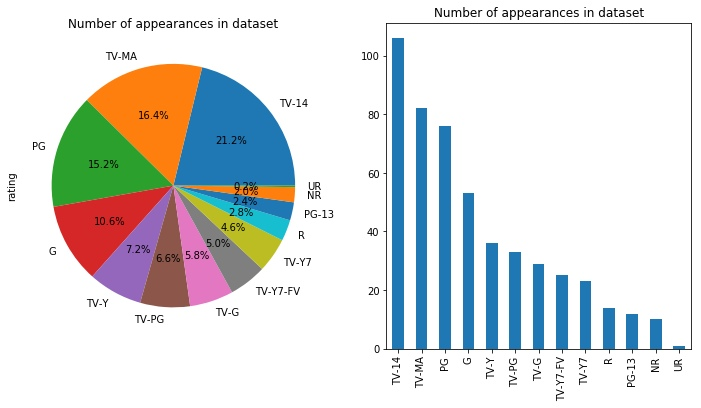

In [ ]:
...

**Вывод:** <...>

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится. Обозначим это шоу N.
Ответьте на следующие вопросы.
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [ ]:
...

Ответьте на следующие вопросы, проанализировав `boxplot`-график.
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет, за которые есть данные? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [ ]:
...

**Вывод:** <...>

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [ ]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [ ]:
...

Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [ ]:
...

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

In [ ]:
...

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [ ]:
...

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

In [ ]:
...

**Вывод:** <...>

---

### Задача 5

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

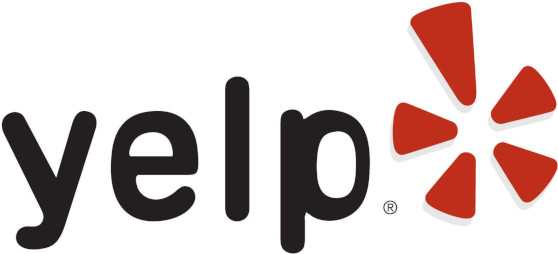

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
...

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [ ]:
...

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города `N` и сравните ее с построенным графиком. Попробуйте также для графиков в этой задаче автоматически подгружать карту города в качестве фона графика, используя <a href="https://plotly.com/python/scattermapbox/">примеры</a>.

*Замечание. Если у вас возникает ошибка `Notebook validation failed`, попробуйте открыть ноутбук текстовым редактором и в самом конце заменить `"nbformat_minor": 1` на `"nbformat_minor": 4`.*

In [ ]:
...

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
...

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
...

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша.

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>